In [18]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import datetime as dt
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
def get_tweets(concepto, start_date, end_date, location, max_tweets):

	scrap = sntwitter.TwitterSearchScraper(concepto + ' since:' + start_date + ' until:' + end_date + 'location:' + location + ' -filter:retweets')

	tweets_list = {}

	for i, tweet in tqdm(enumerate(scrap.get_items()), total=max_tweets):
		
		tweets_list[i] = {
			'date': tweet.date,
			'id': tweet.id,
			'rawContent': tweet.rawContent,
			'replyCount': tweet.replyCount,
			'retweetCount': tweet.retweetCount,
			'likeCount': tweet.likeCount,
			'quoteCount': tweet.quoteCount,
			'lang': tweet.lang,
			'place': tweet.place,
			'hashtags': tweet.hashtags,
			'mentionedUsers': tweet.mentionedUsers,
			'user_id': tweet.user.id,
			'user_name': tweet.user.username,
			'user_renderedDescription': tweet.user.renderedDescription,
			'user_join_date': tweet.user.created,
			'user_followers': tweet.user.followersCount,
			'user_location': tweet.user.location,
			'user_verified': tweet.user.verified,
			'inReplyToTweetId': str(tweet.inReplyToTweetId)
		}

		if i > max_tweets:
			break
	
	# return tweets_list
	df = pd.DataFrame.from_dict(tweets_list, orient='index')
	return df

In [14]:
m1 = pd.read_csv('datasets/dataset_mencion1.csv')
m1 = m1[m1['hashtags'].isna() == False]['hashtags']

total_hashtags = []

for i in m1:
	i = i.replace('[', '').replace(']', '').replace("'", '').split(', ')
	for j in i:
		total_hashtags.append(j)

total_hashtags = pd.Series(total_hashtags)
total_hashtags.to_csv('datasets/hashtags.csv', index=False)
total_hashtags.head()

0               Chile
1           ChileVota
2    ChileVotaApruebo
3             Apruebo
4            chilenos
dtype: object

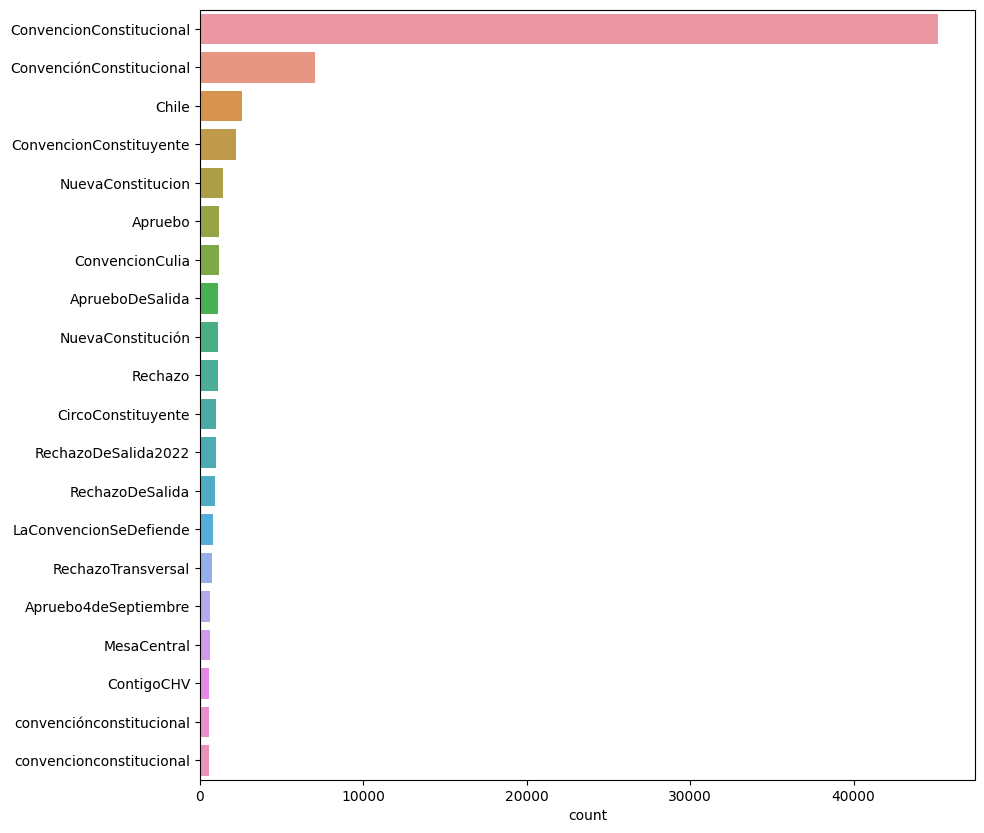

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y=total_hashtags, order=total_hashtags.value_counts()[:20].index, ax=ax)
plt.show()

In [68]:
conceptos=['Convencion_Constitucional',
	'Proceso_Constituyente',
	'Nueva_Constitucion',
	'Convencion_Constituyente']

# proceso 2019
# for concepto in conceptos:
# 	dataset = get_tweets(concepto, '2019-11-15', '2020-12-31', 100_000)
# 	dataset.to_csv('datasets/2019/' + concepto.replace(' ','_') + '_2019.csv', index=False)

for concepto in conceptos:
	dataset = get_tweets(concepto, '2021-07-01', '2021-09-30', 'chile', 100_000)
	dataset.to_csv('datasets/2021/' + concepto.replace(' ','_') + '_2021_Q1.csv', index=False)
	print(concepto + ': ' + str(len(dataset)))

  0%|          | 0/100000 [00:00<?, ?it/s]

Convencion_Constitucional: 11781


  0%|          | 0/100000 [00:00<?, ?it/s]

Proceso_Constituyente: 14299


  0%|          | 0/100000 [00:00<?, ?it/s]

Nueva_Constitucion: 79510


  0%|          | 0/100000 [00:00<?, ?it/s]

Convencion_Constituyente: 7076


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100002 entries, 0 to 100001
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   date                      100002 non-null  datetime64[ns, UTC]
 1   id                        100002 non-null  int64              
 2   rawContent                100002 non-null  object             
 3   replyCount                100002 non-null  int64              
 4   retweetCount              100002 non-null  int64              
 5   likeCount                 100002 non-null  int64              
 6   quoteCount                100002 non-null  int64              
 7   lang                      100002 non-null  object             
 8   place                     3159 non-null    object             
 9   hashtags                  18024 non-null   object             
 10  mentionedUsers            45554 non-null   object             
 11  